# Features : Analysing Results mBERT

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
from statistics import mean, variance
import matplotlib.pyplot as plt; plt.rcdefaults()

1) Read in results:

In [125]:
# from Jowita: results = pd.DataFrame(columns=['FEATURE','EXPERIMENT','FINE_TUNING','f1_1', 'f1_2', 'f1_3','f1_4'])

feat_results_raw = pd.read_csv('features_gathering_results_mBERT.csv', sep=',')
feat_results_raw.head()

FEATURE  DATASET  EXPERIMENT    FINE_TUNING  eval_loss  f1 score
0  Feature 1        1           1  fine_tuning 1   0.293387  0.850223
1  Feature 1        1           1  fine_tuning 2   0.287140  0.847339
2  Feature 1        1           2  fine_tuning 1   0.189678  0.866065
3  Feature 1        1           2  fine_tuning 2   0.204986  0.866517
4  Feature 1        2           1  fine_tuning 1   0.271772  0.841080

In [126]:
feat_results_raw['FEATURE'] = feat_results_raw['FEATURE'].apply(lambda x: str(x).split(" ")[1])

In [127]:
feat_results_raw['FEATURE'] = feat_results_raw['FEATURE'].apply(lambda x: int(x))
feat_results_raw.sort_values(by=['FEATURE']).reset_index()

index  FEATURE  DATASET  EXPERIMENT    FINE_TUNING  eval_loss  f1 score
0        0        1        1           1  fine_tuning 1   0.293387  0.850223
1       15        1        4           2  fine_tuning 2   0.236640  0.852172
2       14        1        4           2  fine_tuning 1   0.230451  0.847539
3       13        1        4           1  fine_tuning 2   0.288683  0.852795
4       12        1        4           1  fine_tuning 1   0.299995  0.839940
5       10        1        3           2  fine_tuning 1   0.212440  0.848378
6        9        1        3           1  fine_tuning 2   0.278751  0.863363
7        8        1        3           1  fine_tuning 1   0.277533  0.851772
8       11        1        3           2  fine_tuning 2   0.209235  0.841378
9        6        1        2           2  fine_tuning 1   0.235112  0.835863
10       5        1        2           1  fine_tuning 2   0.274898  0.850418
11       4        1        2           1  fine_tuning 1   0.271772  0.841080
12       3        1        1           2  fine_tuning 2   0.204986  0.866517
13       2        1        1           2  fine_tuning 1   0.189678  0.866065
14       1        1        1           1  fine_tuning 2   0.287140  0.847339
15       7        1        2           2  fine_tuning 2   0.220681  0.848608
16      25        2        3           1  fine_tuning 2   0.262087  0.803939
17      31        2        4           2  fine_tuning 2   0.414177  0.770339
18      30        2        4           2  fine_tuning 1   0.394590  0.751532
19      29        2        4           1  fine_tuning 2   0.316054  0.810038
20      28        2        4           1  fine_tuning 1   0.282253  0.798890
21      26        2        3           2  fine_tuning 1   0.319047  0.785178
22      24        2        3           1  fine_tuning 1   0.242089  0.828368
23      27        2        3           2  fine_tuning 2   0.465228  0.748987
24      22        2        2           2  fine_tuning 1   0.437469  0.709412
25      21        2        2           1  fine_tuning 2   0.257932  0.820758
26      20        2        2           1  fine_tuning 1   0.276792  0.785650
27      19        2        1           2  fine_tuning 2   0.436640  0.765332
28      18        2        1           2  fine_tuning 1   0.451510  0.738438
29      17        2        1           1  fine_tuning 2   0.242325  0.825801
..     ...      ...      ...         ...            ...        ...       ...
178    188       12        4           1  fine_tuning 1   0.279674  0.788376
179    191       12        4           2  fine_tuning 2   0.484842  0.752935
180    187       12        3           2  fine_tuning 2   0.454155  0.742546
181    186       12        3           2  fine_tuning 1   0.553314  0.670577
182    185       12        3           1  fine_tuning 2   0.244232  0.816916
183    184       12        3           1  fine_tuning 1   0.294645  0.779702
184    179       12        1           2  fine_tuning 2   0.410157  0.764427
185    182       12        2           2  fine_tuning 1   0.485938  0.737558
186    181       12        2           1  fine_tuning 2   0.294082  0.783250
187    180       12        2           1  fine_tuning 1   0.316182  0.777686
188    178       12        1           2  fine_tuning 1   0.456303  0.748120
189    177       12        1           1  fine_tuning 2   0.308157  0.794110
190    176       12        1           1  fine_tuning 1   0.306323  0.797842
191    183       12        2           2  fine_tuning 2   0.483093  0.718175
192    205       13        4           1  fine_tuning 2   0.201994  0.833189
193    204       13        4           1  fine_tuning 1   0.247920  0.815212
194    203       13        3           2  fine_tuning 2   0.252131  0.819596
195    202       13        3           2  fine_tuning 1   0.303448  0.807673
196    201       13        3           1  fine_tuning 2   0.176013  0.856587
197    200       13        3           1  fine_tuning 1   0.225668  0.819532
1

In [128]:
#Transforming it to the format feat_results_raw[['FEATURE','EXPERIMENT','FINE_TUNING','f1_1', 'f1_2', 'f1_3','f1_4']]
feat_results_transf = pd.DataFrame(columns=['FEATURE','EXPERIMENT','FINE_TUNING','f1_1', 'f1_2', 'f1_3','f1_4'])
list_of_Series = []

for feat in feat_results_raw['FEATURE'].unique().tolist():
    
    fine_tuning1 = feat_results_raw[(feat_results_raw['FEATURE'] == feat) & (feat_results_raw['FINE_TUNING'] == 'fine_tuning 1')]
    fine_tuning1_exp1 = fine_tuning1[fine_tuning1['EXPERIMENT'] == 1].reset_index().sort_values(by='DATASET')
    fine_tuning1_exp2 = fine_tuning1[fine_tuning1['EXPERIMENT'] == 2].reset_index().sort_values(by='DATASET')
    
    fine_tuning2 = feat_results_raw[(feat_results_raw['FEATURE'] == feat) & (feat_results_raw['FINE_TUNING'] == 'fine_tuning 2')]
    fine_tuning2_exp1 = fine_tuning2[fine_tuning2['EXPERIMENT'] == 1].reset_index().sort_values(by='DATASET')
    fine_tuning2_exp2 = fine_tuning2[fine_tuning2['EXPERIMENT'] == 2].reset_index().sort_values(by='DATASET')
    
    Series_fine_tuning1_exp1 = pd.Series([fine_tuning1_exp1['FEATURE'][0], fine_tuning1_exp1['EXPERIMENT'][0], fine_tuning1_exp1['FINE_TUNING'].iloc[0], fine_tuning1_exp1['f1 score'].iloc[0], fine_tuning1_exp1['f1 score'].iloc[1], fine_tuning1_exp1['f1 score'].iloc[2], fine_tuning1_exp1['f1 score'].iloc[3]], index=feat_results_transf.columns)
    Series_fine_tuning1_exp2 = pd.Series([fine_tuning1_exp2['FEATURE'][0], fine_tuning1_exp2['EXPERIMENT'][0], fine_tuning1_exp2['FINE_TUNING'].iloc[0], fine_tuning1_exp2['f1 score'].iloc[0], fine_tuning1_exp2['f1 score'].iloc[1], fine_tuning1_exp2['f1 score'].iloc[2], fine_tuning1_exp2['f1 score'].iloc[3]], index=feat_results_transf.columns)
    Series_fine_tuning2_exp1 = pd.Series([fine_tuning2_exp1['FEATURE'][0], fine_tuning2_exp1['EXPERIMENT'][0], fine_tuning2_exp1['FINE_TUNING'].iloc[0], fine_tuning2_exp1['f1 score'].iloc[0], fine_tuning2_exp1['f1 score'].iloc[1], fine_tuning2_exp1['f1 score'].iloc[2], fine_tuning2_exp1['f1 score'].iloc[3]], index=feat_results_transf.columns)
    Series_fine_tuning2_exp2 = pd.Series([fine_tuning2_exp2['FEATURE'][0], fine_tuning2_exp2['EXPERIMENT'][0], fine_tuning2_exp2['FINE_TUNING'].iloc[0], fine_tuning2_exp2['f1 score'].iloc[0], fine_tuning2_exp2['f1 score'].iloc[1], fine_tuning2_exp2['f1 score'].iloc[2], fine_tuning2_exp2['f1 score'].iloc[3]], index=feat_results_transf.columns)
                             
        
    list_of_Series += [Series_fine_tuning1_exp1, Series_fine_tuning1_exp2, Series_fine_tuning2_exp1, Series_fine_tuning2_exp2]

feat_results_transf = feat_results_transf.append(list_of_Series, ignore_index=True).sort_values(by=['FEATURE','EXPERIMENT','FINE_TUNING']).reset_index()
feat_results_transf.head()

index FEATURE EXPERIMENT    FINE_TUNING      f1_1      f1_2      f1_3  \
0      0       1          1  fine_tuning 1  0.850223  0.841080  0.851772   
1      2       1          1  fine_tuning 2  0.847339  0.850418  0.863363   
2      1       1          2  fine_tuning 1  0.866065  0.835863  0.848378   
3      3       1          2  fine_tuning 2  0.866517  0.848608  0.841378   
4      4       2          1  fine_tuning 1  0.824514  0.785650  0.828368   

       f1_4  
0  0.839940  
1  0.852795  
2  0.847539  
3  0.852172  
4  0.798890

2) Data Cleaning: Filter for f1 scores + mean/variance/std calculation of f1 score

In [129]:
feat_results_f1 = feat_results_transf[['FEATURE','EXPERIMENT', 'FINE_TUNING', 'f1_1','f1_2','f1_3','f1_4']]
    
feat_results_f1 = feat_results_f1.reindex(columns = ['FEATURE','EXPERIMENT', 'FINE_TUNING','f1_1','f1_2','f1_3','f1_4','mean','variance', 'standard dev'])

# changing to procent format
feat_results_f1['f1_1'] = feat_results_f1['f1_1'].apply(lambda x: x*100)
feat_results_f1['f1_2'] = feat_results_f1['f1_2'].apply(lambda x: x*100)
feat_results_f1['f1_3'] = feat_results_f1['f1_3'].apply(lambda x: x*100)
feat_results_f1['f1_4'] = feat_results_f1['f1_4'].apply(lambda x: x*100)

for index, row in feat_results_f1.iterrows():
    
    if row['f1_4'] == 0:
        feat_results_f1.at[index,'mean'] = np.mean([row['f1_1'],row['f1_2'],row['f1_3']])
        feat_results_f1.at[index,'variance'] = np.var([row['f1_1'],row['f1_2'],row['f1_3']])
        feat_results_f1.at[index,'standard dev'] = np.std([row['f1_1'],row['f1_2'],row['f1_3']])
    else:
        feat_results_f1.at[index,'mean'] = np.mean([row['f1_1'],row['f1_2'],row['f1_3'],row['f1_4']])
        feat_results_f1.at[index,'variance'] = np.var([row['f1_1'],row['f1_2'],row['f1_3'],row['f1_4']])
        feat_results_f1.at[index,'standard dev'] = np.std([row['f1_1'],row['f1_2'],row['f1_3'],row['f1_4']])

feat_results_f1.to_csv('Features_all_results_mBERT.csv', index=False)

3) Change format to: [EXPERIMENT, FINE_TUNING_1_f1_score_mean, FINE_TUNING_1_f1_score_std, FINE_TUNING_2_f1_score_mean, FINE_TUNING_2_f1_score_std, relative improvement]

Note: for each feature two experiments changing eval/fine-tune TRUE group

In [130]:
feat_results_compressed = pd.DataFrame(columns=['FEATURE','EXPERIM','FINT1_f1_mean','FINT1_f1_std','FINT2_f1_mean','FINT2_f1_std','rel. Diff'])

list_of_Series = []

for index, row in feat_results_f1.iterrows():
    
    if (index % 2 == 0):
            
        f2_mean = feat_results_f1.iloc[index+1]['mean']
        f2_std = feat_results_f1.iloc[index+1]['standard dev']
        rel_diff = ((f2_mean - row['mean'])/ row['mean'])*100
            
            
        list_of_Series += [pd.Series([row['FEATURE'],row['EXPERIMENT'], row['mean'], row['standard dev'], f2_mean, f2_std, rel_diff], index=feat_results_compressed.columns)]

feat_results_compressed = feat_results_compressed.append(list_of_Series, ignore_index=True)
feat_results_compressed['FEATURE'] = feat_results_compressed['FEATURE'].apply(lambda x: int(x))

feat_results_compressed.to_csv('Features_compressed_mBERT.csv', index=False)
feat_results_compressed.to_excel("features_results_analysed_mBERT.xlsx") 

4) Analysing standard deviation over 4 iterations

In [131]:
feat_results_compressed.head()

FEATURE  EXPERIM  FINT1_f1_mean  FINT1_f1_std  FINT2_f1_mean  FINT2_f1_std  \
0        1      1.0      84.575352      0.528743      85.347887      0.602559   
1        1      2.0      84.946129      1.078742      85.216894      0.915146   
2        2      1.0      80.935558      1.776759      81.513402      0.861262   
3        2      2.0      74.613977      2.720897      76.178659      0.790631   
4        3      1.0      85.457039      0.320550      85.439259      0.537756   

   rel. Diff  
0   0.913428  
1   0.318749  
2   0.713956  
3   2.097036  
4  -0.020806

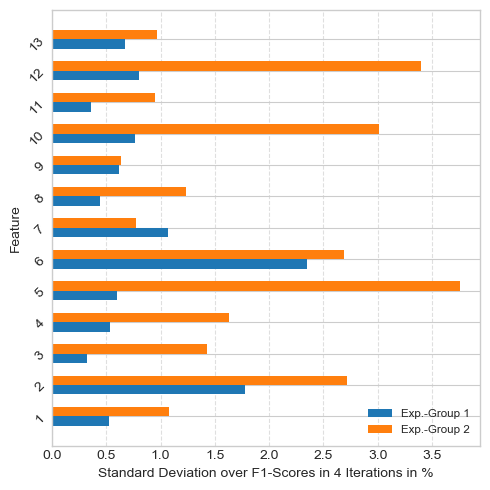

In [134]:
# Fine-Tuning 1
FT1 = feat_results_compressed[['FEATURE', 'EXPERIM','FINT1_f1_std']]
objects = feat_results_compressed['FEATURE'].unique().tolist()
x = np.arange(len(objects))
y_1 = FT1[FT1['EXPERIM'] == 1.0]['FINT1_f1_std'].values.tolist()
y_2 = FT1[FT1['EXPERIM'] == 2.0]['FINT1_f1_std'].values.tolist()
    
fig, ax = plt.subplots(figsize=(5,5))
width = 0.3
opacity = 0.8

rects1 = ax.barh(x - width/2, y_1, width, label='Exp.-Group 1')
rects2 = ax.barh(x + width/2, y_2, width, label='Exp.-Group 2')

ax.set_xlabel('Standard Deviation over F1-Scores in 4 Iterations in %')
ax.set_ylabel('Feature')
#ax.set_title('Standard Deviations Fine-Tuning 1 (FALSE-TRUE) mBERT')
ax.set_yticks(x)
#ax.set_xlim(xmax = 90, xmin = 60)
ax.set_yticklabels(objects, rotation=45)
ax.xaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.25)
ax.legend(loc='lower right',fontsize='small')

plt.style.use('seaborn-whitegrid')

fig.tight_layout()
plt.show()
fig.savefig('Std_mBERT_f1scores_FT1.png')

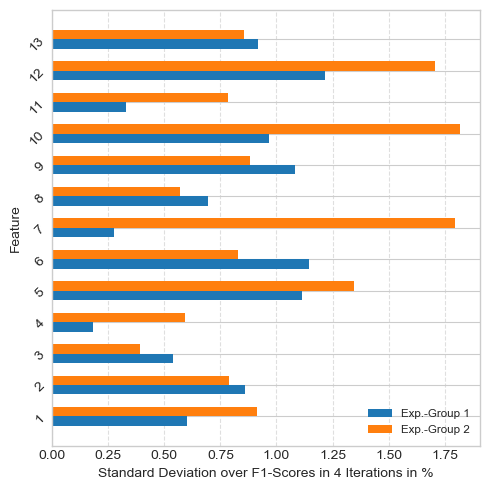

In [133]:
# Fine-Tuning 2
FT2 = feat_results_compressed[['FEATURE', 'EXPERIM','FINT2_f1_std']]
objects = feat_results_compressed['FEATURE'].unique().tolist()
x = np.arange(len(objects))
y_1 = FT2[FT2['EXPERIM'] == 1.0]['FINT2_f1_std'].values.tolist()
y_2 = FT2[FT2['EXPERIM'] == 2.0]['FINT2_f1_std'].values.tolist()
    
fig, ax = plt.subplots(figsize=(5,5))
width = 0.3
opacity = 0.8

rects1 = ax.barh(x - width/2, y_1, width, label='Exp.-Group 1')
rects2 = ax.barh(x + width/2, y_2, width, label='Exp.-Group 2')

ax.set_xlabel('Standard Deviation over F1-Scores in 4 Iterations in %')
ax.set_ylabel('Feature')
#ax = sns.set(style="whitegrid")
#ax.set_title('Standard Deviations Fine-Tuning 2 (FALSE-TRUE) mBERT')
ax.set_yticks(x)
#ax.set_xlim(xmax = 90, xmin = 60)
ax.set_yticklabels(objects, rotation=45)
ax.xaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.25)
ax.legend(loc='lower right',fontsize='small')

plt.style.use('seaborn-whitegrid')

fig.tight_layout()
plt.show()
fig.savefig('Std_mBERT_f1scores_FT2.png')

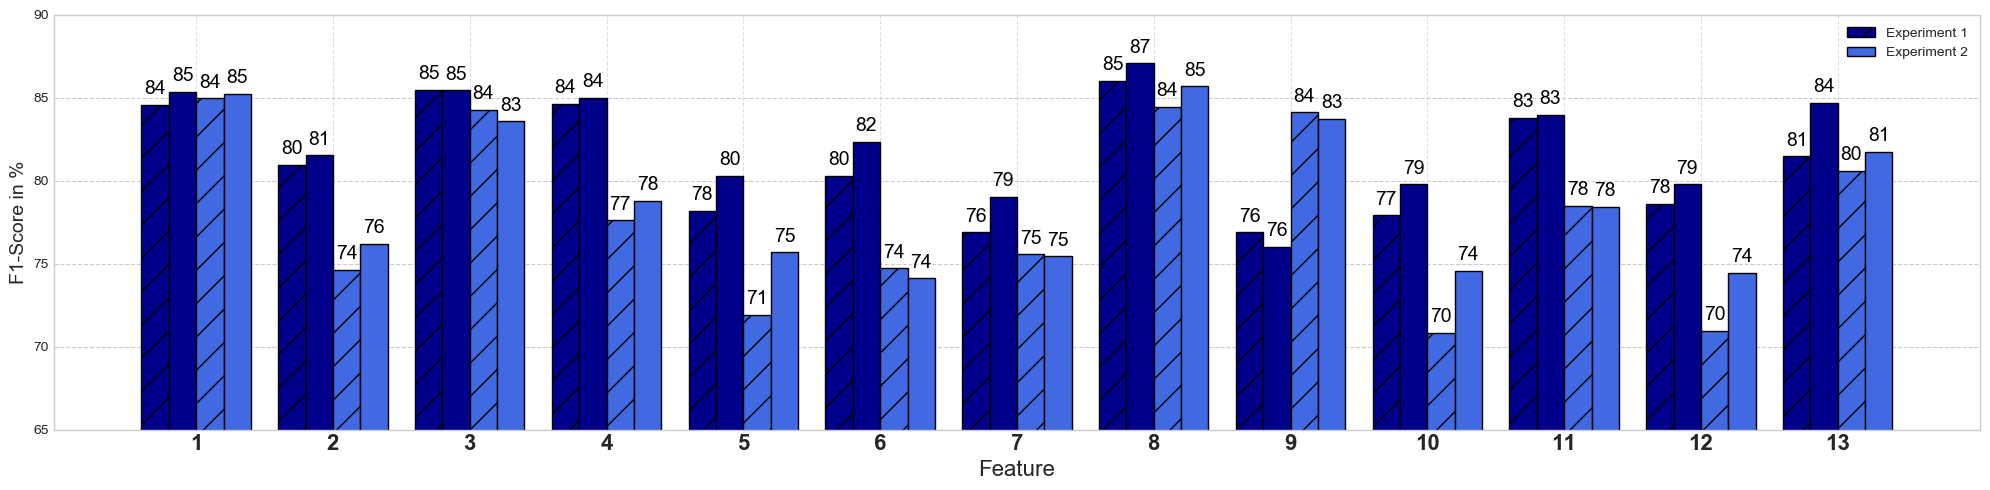

In [210]:
objects = feat_results_compressed['FEATURE'].unique().tolist()

Exp1 = feat_results_compressed[feat_results_compressed['EXPERIM'] == 1.0]
Exp2 = feat_results_compressed[feat_results_compressed['EXPERIM'] == 2.0]

x = np.arange(len(objects))
y1_mBERT = Exp1['FINT1_f1_mean'].values.tolist()
y2_mBERT = Exp1['FINT2_f1_mean'].values.tolist()
y3_mBERT = Exp2['FINT1_f1_mean'].values.tolist()
y4_mBERT = Exp2['FINT2_f1_mean'].values.tolist()


fig, ax = plt.subplots(figsize=(20,5))
width = 0.2
opacity = 0.8

rects1 = ax.bar(x - (width + width/2), y1_mBERT, width, label='Experiment 1', color = 'darkblue',edgecolor='black',hatch="/")
rects2 = ax.bar(x - width/2, y2_mBERT, width, color = 'darkblue',edgecolor='black')
rects3 = ax.bar(x + width/2, y3_mBERT, width, color = 'royalblue',edgecolor='black',hatch="/")
rects4 = ax.bar(x + (width + width/2), y4_mBERT, width, label='Experiment 2', color = 'royalblue',edgecolor='black')

ax.set_ylabel('F1-Score in %', fontsize=14)
ax.set_xlabel('Feature', fontsize=16)
#ax.set_title('Fine-Tuning 2 - Comparison F1 Scores between mBERT and XLMR')
ax.set_xticks(x)
ax.set_ylim(ymin=65, ymax = 90)
ax.set_xticklabels(objects, fontsize=16, fontweight='bold')
ax.xaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.25)
ax.legend()

for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_height())), (p.get_x()+0.1, p.get_height()+0.4),
                    ha='center', va='bottom',
                    color= 'black',fontsize=14)


plt.grid(True, linestyle='--')
fig.tight_layout()
plt.show()
fig.savefig('mBERT_f1scores.png')

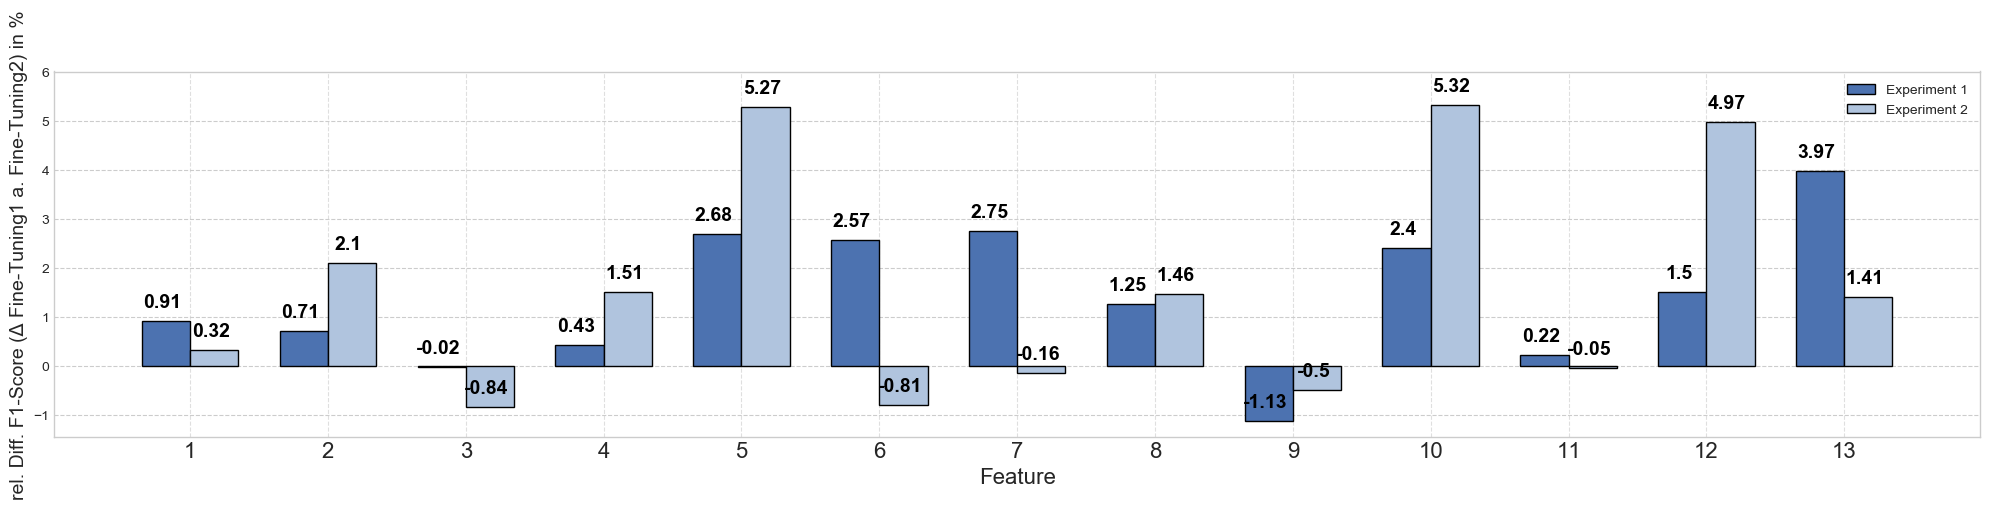

In [208]:
objects = feat_results_compressed['FEATURE'].unique().tolist()

Exp1 = feat_results_compressed[feat_results_compressed['EXPERIM'] == 1.0]
Exp2 = feat_results_compressed[feat_results_compressed['EXPERIM'] == 2.0]

x = np.arange(len(objects))
y1_mBERT = Exp1['rel. Diff'].values.tolist()
y2_mBERT = Exp2['rel. Diff'].values.tolist()



fig, ax = plt.subplots(figsize=(20,5))
width = 0.35
opacity = 0.8

rects1 = ax.bar(x - width/2, y1_mBERT, width, label='Experiment 1', color = 'b',edgecolor='black')
rects2 = ax.bar(x + width/2, y2_mBERT, width, label='Experiment 2', color = 'lightsteelblue',edgecolor='black')
#rects3 = ax.bar(x + width/2, y3_mBERT, width, color = 'darkblue',edgecolor='black')
#rects4 = ax.bar(x + (width + width/2), y4_mBERT, width, color = 'royalblue',edgecolor='black')

ax.set_ylabel('rel. Diff. F1-Score (\u0394 Fine-Tuning1 a. Fine-Tuning2) in %', fontsize=14)
ax.set_xlabel('Feature', fontsize=16)
#ax.set_title('Fine-Tuning 2 - Comparison F1 Scores between mBERT and XLMR')
ax.set_xticks(x)
ax.set_ylim(ymax = 6)
ax.set_xticklabels(objects, fontsize=16)
ax.xaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.25)
ax.legend()

for p in ax.patches:
        ax.annotate('{}'.format(round(p.get_height(),2)), (p.get_x()+0.15, p.get_height()+0.2),
                    ha='center', va='bottom',
                    color= 'black',fontsize=14, fontweight='bold')

plt.grid(True, linestyle='--')
fig.tight_layout()
plt.show()
fig.savefig('mBERT_f1scores_reldiff.png')